Loads the images from the DATA_DIRECTORY using imread, and appending the data and label to respective lists. Generates a visual of a random selection of 25 images, and then uses SVM and a CNN model to classify the images across seven categories. 

In [ ]:
import numpy as np
import os
import random
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from enum import Enum
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd


In [ ]:
# Set the directory to where the data is stored
DATA_DIRECTORY = '/path/to/your/data/directory'

In [ ]:
# Defines an enum for the labels
class Emotion(Enum):
    SURPRISE = 0
    SAD = 1
    NEUTRAL = 2
    HAPPY = 3
    FEAR = 4
    DISGUST = 5
    ANGRY = 6

In [ ]:
# Initializes empty lists for the images and labels
images = []
flat_images = []
labels = []

# Creates a list containing all files in the FER directory
# The files should be a renamed sample of the FER2013 dataset
files = os.listdir(DATA_DIRECTORY)

# Iterates through the files list, reads the images as a 48x48 numpy array.
# Then the corresponding label for that image is added to the labels list.
for file in files:
    img = imread(DATA_DIRECTORY + file)
    images.append(img)
    flat_images.append(img.flatten())
    if 'surprise' in file:
        labels.append(Emotion.SURPRISE.value)
    elif 'sad' in file:
        labels.append(Emotion.SAD.value)
    elif 'neutral' in file:
        labels.append(Emotion.NEUTRAL.value)
    elif 'happy' in file:
        labels.append(Emotion.HAPPY.value)
    elif 'fear' in file:
        labels.append(Emotion.FEAR.value)
    elif 'disgust' in file:
        labels.append(Emotion.DISGUST.value)
    elif 'angry' in file:
        labels.append(Emotion.ANGRY.value)

In [ ]:
print(len(labels))

2100


In [ ]:
flat_images[0].shape

(2304,)

In [ ]:
images[0].shape

(48, 48)

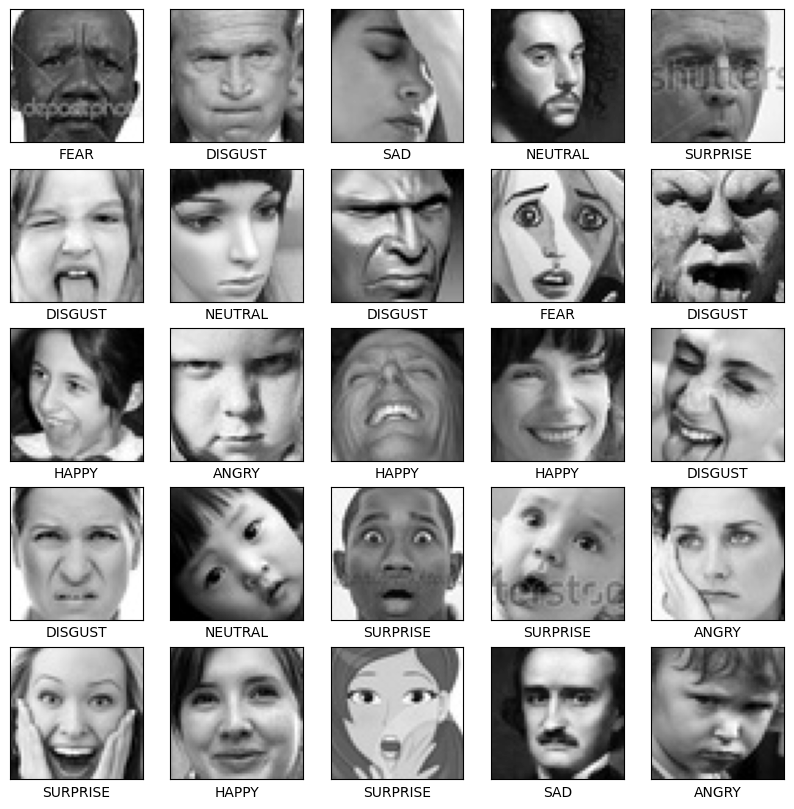

In [ ]:
# Verify that the labels were correctly assigned to the images by plotting the
# first 25 images and their corresponding label.
# Randomly select 25 indices
random_indices = np.random.choice(len(images), size=25, replace=False)

plt.figure(figsize=(10,10))
for i, idx in enumerate(random_indices):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[idx], cmap='gray')

    # Plots with the picture's enum member name
    plt.xlabel(Emotion(labels[idx]).name)
plt.show()

In [ ]:
# Partitions the data and target arrays into training and testing sets.
# p: percentage of the data set used for training
def partition(data, labels, p):
    # Split data into 50% train and 50% test subsets
    train_data, test_data, train_target, test_target = train_test_split(
    data, labels, test_size=(1 - p), shuffle=True)
    return train_data, test_data, train_target, test_target

In [ ]:
def prediction(train_data, test_data, train_target, test_target):
    # Create a classifier: a support vector classifier
    clf = svm.SVC(C = 100000, kernel = 'rbf', gamma='scale')

    # Learn the digits on the train subset
    clf.fit(train_data, train_target)

    # Predict the value of the digit on the test subset
    predicted = clf.predict(test_data)

    print("Predicted: ", predicted)
    print("Truth: ", np.array(test_target))
    accuracy = accuracy_score(test_target, predicted)
    print("Accuracy: {:.1%}".format(accuracy))

    return predicted



In [ ]:
train_data, test_data, train_target, test_target = partition(flat_images, labels, 0.8)

predicted = prediction(train_data, test_data, train_target, test_target)

Predicted:  [3 5 1 5 5 5 5 1 5 5 4 4 3 3 1 1 1 0 5 5 1 0 4 6 3 1 1 2 4 0 6 2 0 5 0 2 2
 2 0 0 5 4 4 1 2 1 3 5 2 5 2 5 6 1 1 6 3 0 6 4 1 1 3 1 4 6 0 6 5 0 1 0 5 1
 6 6 6 2 5 5 2 3 4 0 3 3 2 5 4 0 5 0 3 4 4 5 4 3 2 3 1 6 0 1 0 3 0 4 3 1 3
 0 0 4 4 4 3 2 0 6 4 0 0 4 1 6 1 0 5 0 6 1 1 6 2 4 4 1 5 0 1 5 0 6 0 3 2 6
 0 5 1 3 2 2 5 3 2 3 2 1 4 0 5 1 1 0 5 4 3 1 4 3 2 2 3 0 5 6 2 3 3 0 1 2 0
 0 6 3 4 4 4 5 2 6 4 3 0 0 3 0 0 5 2 6 2 3 2 3 2 0 1 6 0 5 0 5 6 4 2 0 3 4
 2 3 1 2 1 1 2 3 0 1 3 4 0 4 5 0 2 4 3 3 5 6 6 5 5 5 1 3 0 0 5 3 2 4 1 5 0
 3 1 4 0 5 5 1 4 5 2 2 1 4 5 5 4 6 2 0 2 2 4 6 6 1 6 5 1 6 1 6 6 1 1 6 1 1
 0 0 4 2 1 1 6 3 5 3 3 2 1 1 1 6 0 4 0 0 1 1 3 4 2 2 4 6 2 1 3 0 1 4 1 1 4
 0 3 5 2 4 1 5 0 5 4 2 0 4 4 2 1 0 0 1 3 2 2 2 4 2 0 2 5 2 6 5 4 2 3 2 2 1
 2 1 2 0 3 1 6 6 1 2 5 0 5 4 0 3 6 3 3 1 5 4 6 6 6 0 1 5 5 0 3 0 2 6 0 5 0
 6 3 0 0 2 2 4 4 6 3 0 5 2]
Truth:  [0 5 3 2 5 5 1 3 2 5 1 0 6 3 4 6 1 0 5 5 1 6 4 3 3 0 4 1 3 2 0 4 1 4 4 2 3
 4 0 0 5 2 1 5 5 1 0 1 3 5 0 5 0 1 6 0 3 4 1 1 5 4 5

In [ ]:
# Compute accuracy for each class
class_accuracies = {}
emotions = []
for emotion in Emotion:
    # Add the name of the emotions to a list
    emotions.append(emotion.name)

    # Find indices of test data corresponding to the current emotion
    indices = [i for i, label in enumerate(test_target) if label == emotion.value]

    # Filter predicted labels and true labels for the current emotion
    emotion_predicted = [predicted[i] for i in indices]
    emotion_true = [test_target[i] for i in indices]

    # Compute accuracy for the current emotion
    accuracy = accuracy_score(emotion_true, emotion_predicted)

    # Store accuracy in the list
    class_accuracies[emotion.name] = accuracy

# Print accuracy for each class
for emotion, accuracy in class_accuracies.items():
    print(f"Accuracy for {emotion}: {accuracy:.2f}")

plt.show()


Accuracy for SURPRISE: 0.52
Accuracy for SAD: 0.26
Accuracy for NEUTRAL: 0.28
Accuracy for HAPPY: 0.38
Accuracy for FEAR: 0.16
Accuracy for DISGUST: 0.57
Accuracy for ANGRY: 0.15


In [ ]:
images[0].shape

(48, 48)

In [ ]:
CNNimages = np.array(images)

train_data, test_data, train_target, test_target = partition(CNNimages, labels, 0.8)


train_data = np.array(train_data)
train_data = np.expand_dims(train_data, 3)

train_target = np.array(train_target)
test_data = np.array(test_data)
test_data=np.expand_dims(test_data, 3)
test_target = np.array(test_target)

print(train_data.shape)
test_data.shape


(1680, 48, 48, 1)


(420, 48, 48, 1)

In [ ]:
train_target.shape
train_target = np.expand_dims(train_target, 1)
train_target.shape

test_target = np.expand_dims(test_target,1)


In [ ]:
np.unique(train_target)
print(train_target.shape)
print(test_target.shape)

(1680, 1)
(420, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
from keras.initializers import  RandomNormal
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dense(7)
])



model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary()


In [ ]:
history = model.fit(train_data,
                    train_target,
                    epochs = 20,
                    batch_size = 64,
                    validation_data=(test_data, test_target))


Epoch 1/20
27/27 [==============================] - 5s 45ms/step - loss: 1.9485 - accuracy: 0.1268 - val_loss: 1.9471 - val_accuracy: 0.1167
Epoch 2/20
27/27 [==============================] - 1s 24ms/step - loss: 1.9462 - accuracy: 0.1327 - val_loss: 1.9467 - val_accuracy: 0.1167
Epoch 3/20
27/27 [==============================] - 1s 23ms/step - loss: 1.9459 - accuracy: 0.1494 - val_loss: 1.9467 - val_accuracy: 0.1167
Epoch 4/20
16/27 [================>.............] - ETA: 0s - loss: 1.9458 - accuracy: 0.1455

KeyboardInterrupt: 

In [ ]:
predicted = np.argmax(model.predict(test_data), axis=1)



# Compute accuracy for each class
class_accuracies = {}
emotions = []
for emotion in Emotion:
    # Add the name of the emotions to a list
    emotions.append(emotion.name)

    # Find indices of test data corresponding to the current emotion
    indices = [i for i, label in enumerate(test_target) if label == emotion.value]

    # Filter predicted labels and true labels for the current emotion
    emotion_predicted = [predicted[i] for i in indices]
    emotion_true = [test_target[i] for i in indices]

    # Compute accuracy for the current emotion
    accuracy = accuracy_score(emotion_true, emotion_predicted)

    # Store accuracy in the list
    class_accuracies[emotion.name] = accuracy

# Print accuracy for each class
for emotion, accuracy in class_accuracies.items():
    print(f"Accuracy for {emotion}: {accuracy:.2f}")

plt.show()


14/14 [==============================] - 0s 23ms/step
Accuracy for SURPRISE: 0.46
Accuracy for SAD: 0.25
Accuracy for NEUTRAL: 0.42
Accuracy for HAPPY: 0.53
Accuracy for FEAR: 0.17
Accuracy for DISGUST: 0.52
Accuracy for ANGRY: 0.23


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
15,1.515141,0.436905,1.716239,0.330952,15
16,1.458879,0.463690,1.677770,0.345238,16
17,1.394357,0.475000,1.659245,0.342857,17
18,1.300930,0.505952,1.638962,0.383333,18
19,1.248672,0.539286,1.652009,0.366667,19


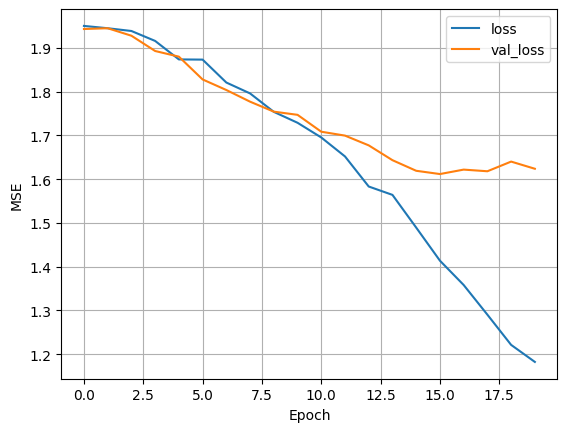

In [ ]:
## creation of plot for the MSE for training and test loss

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

plot_loss(history)

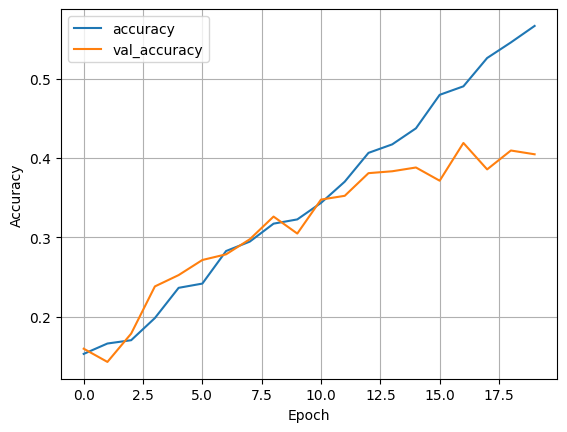

In [ ]:

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plot_accuracy(history)

In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data,
                    train_target,
                    epochs = 20,
                    batch_size = 64,
                    validation_data=(test_data, test_target))


Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 7) are incompatible
